In [ ]:
import sys
sys.version

'3.7.14 (default, Sep  8 2022, 00:06:44) \n[GCC 7.5.0]'

###### 1. comments in python 

In [ ]:
# Example of multi-line commenting via # sign

# Description: Minimal Tutorial for Python Basics
# Course: AMATH 581 Scientific Computing


"""
Example of multi-line commenting via dosctrings

Description: Minimal Tutorial for Python Basics
Course: AMATH 581 Scientific Computing
"""

'\nExample of multi-line commenting via dosctrings\n\nDescription: Minimal Tutorial for Python Basics\nCourse: AMATH 581 Scientific Computing\n'

##### 2. copy vs. deep copy

In [ ]:
## ------------------------------------
## Example 1: w. mutable data type
## ------------------------------------
a = [2, 5]        ## type(a) == list ---> mutable
b = a

a[0] = 1
print('The list stored in variable w name b is: ', b,' b also changed!')

The list stored in variable w name b is:  [1, 5]  b also changed!


In [ ]:
## ------------------------------------
## solution to Example 1: deep copy
## ------------------------------------

from copy import deepcopy

c = deepcopy(a)

a[1] = 10
print('The list stored in variable w name c is: ', c, 'c was deep copied; so it did not change!')

The list stored in variable w name c is:  [1, 5] c was deep copied; so it did not change!


In [ ]:
## ------------------------------------
##  Example 2: w. immutable data type
## ------------------------------------
a = 2         ## type(a) == int ---> immutable
b = a

a = 5
print('The value for b is: ', b)      ## The value for b did not change!

The value for b is:  2


##### 3. numpy arrays

In [ ]:
import numpy as np

## ------------------------------------
## a. zero-based indexing
## ------------------------------------

A = np.random.rand(4,3)     ## randomize a 2D array == matrix

print('Randomized matrix A is,\n\n', A)

print('\n\nThe element in the 1st row and 2nd column is ', A[0, 1])       ##  Indexing in python starts at 0.


Randomized matrix A is,

 [[0.05530553 0.74332014 0.01981788]
 [0.80277366 0.07612278 0.71599314]
 [0.14592897 0.89189158 0.31966309]
 [0.71720615 0.70560529 0.58521536]]


The element in the 1st row and 2nd column is  0.7433201369306472


In [ ]:
## ------------------------------------
## b. indexing out of array bounds
## ------------------------------------

# print(A[4,0])     ## 5th row does not exist!
                  ## I cannot access an element in a position 
                  ## beyond the bounds of matrix A.

A[4,0] = np.random.rand()   ## I cannot assign a value to an element 
                            ## in a position beyond the bounds of matrix A.

IndexError: ignored

In [ ]:
## ------------------------------------
## c. range of values in numpy
## ------------------------------------

dt = 2      ## step size

tspan_one = np.arange(0., 20., dt)    ## np.arange(start, stop, step)      
                                      ## will form a [start, stop) 
                                      ## interval of timepoints.

print('tspan_one =', tspan_one, 'range does not include the "stop" point!')

tspan_one = [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.] range does not include the "stop" point!


In [ ]:
tspan_two = np.arange(0., 20.+dt, dt)    ## np.arange(start, stop + step, step)
                                         ## will form a [start, stop] 
                                         ## interval of timepoints.

print('tspan_two =', tspan_two, 'range includes the "stop" point!')

tspan_two = [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.] range includes the "stop" point!


In [ ]:
## ------------------------------------
## d. row-vector
## ------------------------------------

u = np.random.rand(1,4)

print('u =', u, ' is a row vector.')

## ------------------------------------
## e. column-vector
## ------------------------------------

v = np.random.rand(4, 1)

print('\nv =', v, ' is a column vector.')

u = [[0.19813281 0.81425909 0.1112863  0.5444591 ]]  is a row vector.

v = [[0.94703795]
 [0.10297641]
 [0.97914784]
 [0.78779393]]  is a column vector.


In [ ]:
## ------------------------------------
## f. row-vector ---> column-vector
## ------------------------------------

u_col_one = np.transpose(u)         ## transpose row-vec u

print(u_col_one, 'column vector obtained from transposing u\n')


u_col_two = u.reshape([-1, 1])      ## reshape row-vec u

print(u_col_two, 'column vector obtained from reshaping u')

[[0.19813281]
 [0.81425909]
 [0.1112863 ]
 [0.5444591 ]] column vector obtained from transposing u

[[0.19813281]
 [0.81425909]
 [0.1112863 ]
 [0.5444591 ]] column vector obtained from reshaping u


In [ ]:
## ------------------------------------
## e. python list into a numpy array
## ------------------------------------

orig = [4, 4.5, 5]

new_array = np.asarray(orig)

print('np.asarray() changed the list into a', type(new_array))

np.asarray() changed the list into a <class 'numpy.ndarray'>


##### 4. defining a function

<font size="2.8">Example. Lorenz System</font>

&nbsp;&nbsp;$\frac{dx}{dt} = \sigma (y - x)$

&nbsp;&nbsp;$\frac{dy}{dt} = x(\rho - z) - y$

&nbsp;&nbsp;$\frac{dz}{dt} = xy - \beta z$

In [ ]:
def sys_rhs(t, y, sigma, rho, beta):    # lorenz sys
  dydt = [sigma * (y[1] - y[0]),     
          y[0] * (rho - y[2]) - y[1],
          y[0] * y[1] - beta * y[2]]
  return  dydt                          # output system w/ return keyword.

##### 5. solving a system of 1st order ODEs

In [ ]:
from scipy.integrate import solve_ivp

tspan = [0, 80]     ## simulation time interval

yt0 = [.4, .8, .1]  ## initial conditions

sigma, rho, beta = 10, 28, 8/3

sol = solve_ivp(sys_rhs, tspan, y0 = yt0, args=(sigma, rho, beta))

sol = solve_ivp(sys_rhs, tspan, y0 = yt0, args=(sigma, rho, beta), 
                t_eval = np.linspace(0.,80.,4000)) 
                    ## optional: to interpolate the solution
                    ## onto time points w. finer resolution.

##### 6. debugging w. pdb debugger

In [ ]:
tspan = [0, 80]     ## simulation time interval

yt0 = [.4, .8, .1]  ## initial conditions

sigma, rho, beta = 10, 28, 8/3

breakpoint()        ## breakpoint() imports pdb package
                    ## opens an input box for you to run tests
                    ## on your code upto this point.
                    ## once done with the tests, you may issue
                    ## "continue" to continue running the code
                    ## upto the next breakpoint or you may 
                    ## issue "quit" to exit the debugger.

sol = solve_ivp(sys_rhs, tspan, y0 = yt0, args=(sigma, rho, beta), 
                t_eval = np.linspace(0.,80.,4000))


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 332, in set_trace
    sys.settrace(self.trace_dispatch)



--Return--
> <ipython-input-8-1ca7e42686f0>(7)<module>()->None
-> breakpoint()        ## breakpoint() imports pdb package
(Pdb) print(yt0)
[0.4, 0.8, 0.1]
(Pdb) continue



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/bdb.py", line 343, in set_continue
    sys.settrace(None)



##### 6. creating a 2D plot

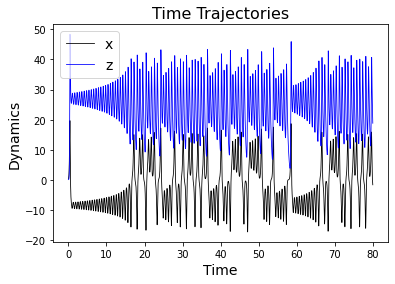

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y[0,:], 'k-', linewidth = .8)
plt.plot(sol.t, sol.y[2,:], 'b-', linewidth = .8)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Dynamics', fontsize=14)
plt.legend(['x', 'z'], fontsize=14)
plt.title('Time Trajectories', fontsize=16)
plt.show()

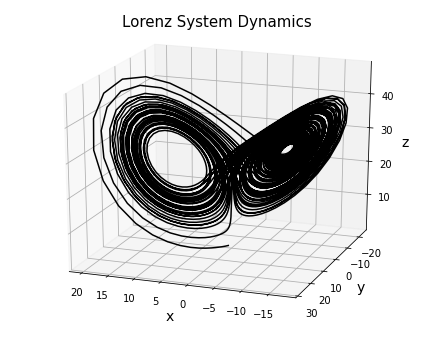

In [ ]:
fig = plt.figure(figsize=(7.5,6))
ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0,:], sol.y[1,:], sol.y[2,:], 'k-')
ax.view_init(20, 110)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
plt.title('Lorenz System Dynamics', fontsize=15)
plt.show()